<a href="https://colab.research.google.com/github/calebriggs1120/CIS-3902-AI-ML--Caleb-Schell/blob/main/copy_of_data_cleaning_exercise_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning in Python — Exercise

**Course:** Intro to Data Mining  
**Dataset:** Heart Failure Prediction dataset (loaded from a public URL — no file downloads needed!)  

---


# YOUR TURN: Practice Exercise

Now apply the same data cleaning pipeline from the Titanic exercise to a **new dataset**: the **Heart Failure Prediction** dataset.

This dataset combines 5 heart disease databases (918 patients total) and contains medical information about patients and whether or not they have heart disease. It has **text columns that need encoding**, potential outliers, and some tricky data quality issues — perfect for practicing everything we just learned.

**Your tasks** (follow the same steps from above):

1. Load the data and take a first look
2. Understand the data types and structure
3. Get descriptive statistics
4. Check for duplicates
5. Handle missing values (decide: drop column, drop row, or impute?)
6. Encode any categorical (`object`) columns
7. Detect and handle outliers
8. Scale the numerical features

The starter code below loads the dataset for you. The rest is up to you!

> **Hints:** Pay close attention to `.describe()` — not all missing values show up as NaN! Also, this dataset was made by combining multiple hospital databases, so check for duplicates.

### About the Heart Failure Prediction Dataset

| Column | Description | Type |
|--------|-------------|------|
| Age | Age in years | Numerical |
| Sex | M = Male, F = Female | Categorical |
| ChestPainType | TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic | Categorical |
| RestingBP | Resting blood pressure (mm Hg) | Numerical |
| Cholesterol | Serum cholesterol (mg/dl) | Numerical |
| FastingBS | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Numerical |
| RestingECG | Normal, ST = ST-T wave abnormality, LVH = left ventricular hypertrophy | Categorical |
| MaxHR | Maximum heart rate achieved | Numerical |
| ExerciseAngina | Y = Yes, N = No | Categorical |
| Oldpeak | ST depression induced by exercise | Numerical |
| ST_Slope | Up = upsloping, Flat = flat, Down = downsloping | Categorical |
| HeartDisease | 1 = heart disease, 0 = no heart disease (TARGET) | Numerical |

### Step 1: Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The Heart Failure Prediction dataset — loaded from a public GitHub URL
# (Originally from Kaggle, combining 5 UCI heart disease databases)
url = 'https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv'

heart = pd.read_csv(url)

print(f'Dataset shape: {heart.shape[0]} rows x {heart.shape[1]} columns')
heart.head()

Dataset shape: 918 rows x 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Step 2: Check data types and structure

Use `.info()` to see the data types and count non-null values.

In [ ]:
# YOUR CODE HERE
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Step 3: Descriptive statistics

Use `.describe()`. Look for anything surprising in the min, max, or mean values.

In [ ]:
# YOUR CODE HERE
heart.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
filtered = heart[(heart['RestingBP'] == 0.00) | (heart['Cholesterol'] == 0.00)]
print(filtered)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M           NAP        102            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y  

In [ ]:
heart['RestingBP'] = heart['RestingBP'].replace(0, heart['RestingBP'].median())
heart['Cholesterol'] = heart['Cholesterol'].replace(0, heart['Cholesterol'].median())


172 rows contain Cholesterol or RestingBP values of 0, indicating missing values

In [ ]:
# Setting the missing values to the median for each category
filtered['RestingBP'] = 130.00
filtered['Cholesterol'] = 223.00

/tmp/ipython-input-446/1965634030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['RestingBP'] = 130.00
/tmp/ipython-input-446/1965634030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Cholesterol'] = 223.00


In [ ]:
# Testing to see if there are any remaining missing values
test = heart[(heart['RestingBP'] == 0.00) | (heart['Cholesterol'] == 0.00)]
print(test)

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


172 rows contain Cholesterol or RestingBP values of 0, indicating missing values

### Step 4: Check for duplicates

How many duplicate rows are there? If any, remove them.

In [ ]:
# YOUR CODE HERE
heart.duplicated().sum()
# To remove: heart = heart.drop_duplicates()


np.int64(0)

### Step 5: Handle missing values

Check the percentage of missing values per column. Then decide what to do:
- Drop columns that are mostly missing
- Drop rows if very few are missing
- Impute (fill) with mean or median if a moderate amount is missing

In [ ]:
# YOUR CODE HERE
# Step 1: Find missing value percentages
(heart.isnull().sum() / len(heart)) * 100

# Step 2: Decide and apply your strategy for each column with missing values


,0
Age,0.0
Sex,0.0
ChestPainType,0.0
RestingBP,0.0
Cholesterol,0.0
FastingBS,0.0
RestingECG,0.0
MaxHR,0.0
ExerciseAngina,0.0
Oldpeak,0.0


### Step 6: Encode categorical variables

Check if any columns are `object` type. If so, decide whether to use label encoding or one-hot encoding.

Hint: Look at `.info()` output — how many unique values does each `object` column have?

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Identify categorical columns (dtype == 'object' means text/string)
cat_cols = [col for col in heart.columns if heart[col].dtype == 'object']

# Identify numerical columns
num_cols = [col for col in heart.columns if heart[col].dtype != 'object']

print('Categorical columns:', cat_cols)
print('Numerical columns: ', num_cols)



Categorical columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numerical columns:  ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [ ]:
heart[cat_cols].nunique()

,0
Sex,2
ChestPainType,4
RestingECG,3
ExerciseAngina,2
ST_Slope,3


In [ ]:
# YOUR CODE HERE
# Hint: Check for object columns with:
heart.select_dtypes(include='object').columns
#
heart['Sex'] = heart['Sex'].map({'M': 0, 'F': 1})
heart['ExerciseAngina'] = heart['ExerciseAngina'].map({'N': 0, 'Y': 1})

heart = pd.get_dummies(heart, columns=['ST_Slope'], drop_first=True)
heart = pd.get_dummies(heart, columns=['RestingECG'], drop_first=True)

heart = pd.get_dummies(heart, columns=['ChestPainType'], drop_first=True)



# For 2 categories: heart['col'] = heart['col'].map({'val1': 0, 'val2': 1})
# For 3+ categories: heart = pd.get_dummies(heart, columns=['col'], drop_first=True)# For 2 categories: heart['col'] = heart['col'].map({'val1': 0, 'val2': 1})
# For 3+ categories: heart = pd.get_dummies(heart, columns=['col'], drop_first=True)

# Think about which columns have 2 categories vs. 3+ categories


In [ ]:
heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140,289,0,172,0,0.0,0,False,True,True,False,True,False,False
1,49,1,160,180,0,156,0,1.0,1,True,False,True,False,False,True,False
2,37,0,130,283,0,98,0,0.0,0,False,True,False,True,True,False,False
3,48,1,138,214,0,108,1,1.5,1,True,False,True,False,False,False,False
4,54,0,150,195,0,122,0,0.0,0,False,True,True,False,False,True,False


### Step 7: Detect and handle outliers

Pick 2-3 numerical columns (e.g., `trestbps`, `chol`, `thalach`). Create box plots and use the IQR method.

Remember: think about whether outliers are real data or errors before removing them!

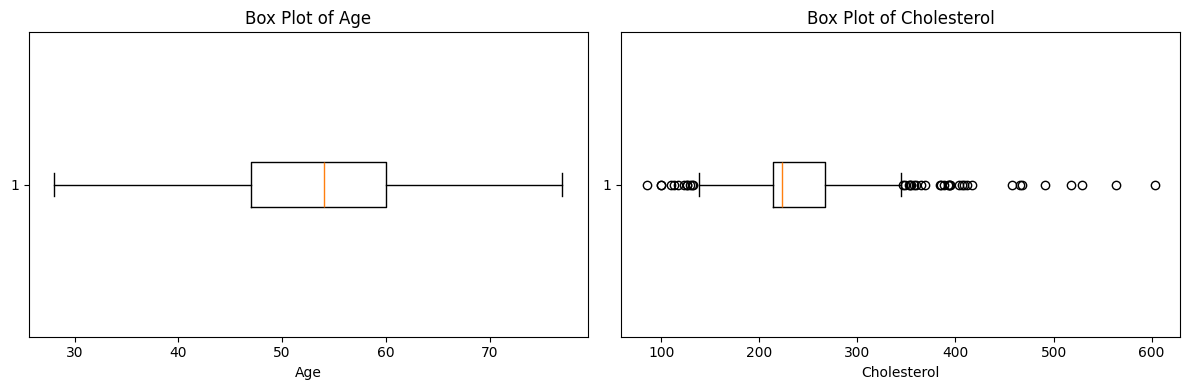

In [ ]:
# Box plots for Age and Fare
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].boxplot(heart['Age'], vert=False)
axes[0].set_xlabel('Age')
axes[0].set_title('Box Plot of Age')

axes[1].boxplot(heart['Cholesterol'], vert=False)
axes[1].set_xlabel('Cholesterol')
axes[1].set_title('Box Plot of Cholesterol')

plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers_iqr(data, column):
    """Detect outliers using the IQR method. Returns a boolean mask."""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    print(f'{column}:')
    print(f'  Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}')
    print(f'  Lower bound = {lower_bound:.2f}, Upper bound = {upper_bound:.2f}')
    print(f'  Number of outliers: {outliers.sum()} ({outliers.sum()/len(data)*100:.1f}%)')
    return outliers

age_outliers = detect_outliers_iqr(heart, 'Age')
print()
cholesterol_outliers = detect_outliers_iqr(heart, 'Cholesterol')

Age:
  Q1 = 47.00, Q3 = 60.00, IQR = 13.00
  Lower bound = 27.50, Upper bound = 79.50
  Number of outliers: 0 (0.0%)

Cholesterol:
  Q1 = 214.00, Q3 = 267.00, IQR = 53.00
  Lower bound = 134.50, Upper bound = 346.50
  Number of outliers: 41 (4.5%)


In [ ]:
# Remove Age outliers
print(f'Rows before removing Age outliers: {len(heart)}')
heart = heart[~cholesterol_outliers]
print(f'Rows after:                        {len(heart)}')

Rows before removing Age outliers: 918
Rows after:                        877


In [ ]:
# YOUR CODE HERE
# Hint: You can reuse the detect_outliers_iqr function from above
# Then create box plots with plt.boxplot()


### Step 8: Scale the numerical features

Apply Min-Max scaling to the numerical columns (not the target column).

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Get the numerical columns to scale
# We exclude 'Survived' (target) and the one-hot columns (already 0/1)
num_cols_to_scale = num_cols

# Make a copy so we don't modify our cleaned data
df_scaled = heart.copy()

# Apply Min-Max scaling
scaler = MinMaxScaler()
df_scaled[num_cols_to_scale] = scaler.fit_transform(df_scaled[num_cols_to_scale])

print('Scaled data (first 5 rows):')
df_scaled.head()


Scaled data (first 5 rows):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0.229167,0,0.500000,0.731707,0.0,0.788732,0,0.295455,0.0,False,True,True,False,True,False,False
1,0.416667,1,0.666667,0.200000,0.0,0.676056,0,0.409091,1.0,True,False,True,False,False,True,False
2,0.166667,0,0.416667,0.702439,0.0,0.267606,0,0.295455,0.0,False,True,False,True,True,False,False
3,0.395833,1,0.483333,0.365854,0.0,0.338028,1,0.465909,1.0,True,False,True,False,False,False,False
4,0.520833,0,0.583333,0.273171,0.0,0.436620,0,0.295455,0.0,False,True,True,False,False,True,False


In [ ]:
DZ = heart[heart['HeartDisease'] == 1]
print(DZ)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
1     49    1        160          180          0    156               0   
3     48    1        138          214          0    108               1   
8     37    0        140          207          0    130               1   
11    58    0        136          164          0     99               1   
13    49    0        140          234          0    140               1   
..   ...  ...        ...          ...        ...    ...             ...   
911   59    0        164          176          1     90               0   
912   57    1        140          241          0    123               1   
913   45    0        110          264          0    132               0   
914   68    0        144          193          1    141               0   
916   57    1        130          236          0    174               0   

     Oldpeak  HeartDisease  ST_Slope_Flat  ST_Slope_Up  RestingECG_Normal  \
1        1.0          

In [ ]:
heart.describe()


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,53.456100,0.206385,132.257697,236.460661,0.233751,136.881414,0.402509,0.882098,0.553022
std,9.391629,0.404941,17.920479,40.526865,0.423457,25.614406,0.490683,1.070489,0.497464
min,29.000000,0.000000,80.000000,139.000000,0.000000,60.000000,0.000000,-2.600000,0.000000
25%,47.000000,0.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,130.000000,223.000000,0.000000,139.000000,0.000000,0.500000,1.000000
75%,60.000000,0.000000,140.000000,263.000000,0.000000,156.000000,1.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,344.000000,1.000000,202.000000,1.000000,6.200000,1.000000


In [ ]:
DZ.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.0
mean,55.948454,0.094845,134.239175,238.441237,0.340206,127.717526,0.620619,1.267216,1.0
std,8.600609,0.293304,18.831366,38.873220,0.474268,23.757830,0.485734,1.156466,0.0
min,31.000000,0.000000,95.000000,139.000000,0.000000,60.000000,0.000000,-2.600000,1.0
25%,51.000000,0.000000,120.000000,223.000000,0.000000,112.000000,0.000000,0.000000,1.0
50%,57.000000,0.000000,132.000000,223.000000,0.000000,126.000000,1.000000,1.200000,1.0
75%,62.000000,0.000000,144.000000,263.000000,1.000000,145.000000,1.000000,2.000000,1.0
max,77.000000,1.000000,200.000000,342.000000,1.000000,195.000000,1.000000,6.200000,1.0


### Reflection Questions

After completing the exercise, answer these questions (add a text cell or answer here):

1. How did the Heart Disease dataset compare to the Titanic dataset in terms of data quality?
  
  -The date from the Heart Disease dataset contained fewer missing values then the Titanic dataset. There were not as many total rows in the Heart Disease dataset, but it seemed more complete.


2. Which missing value strategy did you use, and why?-
  
  -The largest number of missing values was in the 'Cholesterol' column, missing around 200 rows. This was too many to drop the rows but too few to drop the entire column; I decided to replaced the missing values with the median of the column. Althought the method is certainly not perfect, it was the best option without specfic domain knowledge.


3. Did you find any outliers? Did you remove them? Why or why not?

  -There were outliers found in the 'Cholesterol' column. These were mainly very high values, and while it is possible that they were completely correct and valid entries, I decided to remove them since they represented a very small percentage of data points. Having more specific knowledge as to the possible ranges for this category would have been helpful in determining whether the keep or drop these values.


4. If you were building a model to predict heart disease, which columns do you think would be most important?

  -Based on the columns that are classified as having heart disease, the columns 'FastingBS', 'MaxHR', and 'ExerciseAngina' seem to differ the most with regard to their mean and median compared to the entire dataset. This potentially means that these columns could have larger weights in determining the likelihood that a specific patient could have heart disease.

---
*Great work! You now have hands-on experience with a complete data cleaning pipeline.* Dr. Thompson